In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
pipeline = make_pipeline(StandardScaler(),mlp_reg)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid,y_pred)

In [3]:
rmse

0.505332665796845

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
y_train.dtype

dtype('uint8')

In [7]:
X_train,X_valid,X_test = X_train / 255.,X_valid/255.,X_test/255.

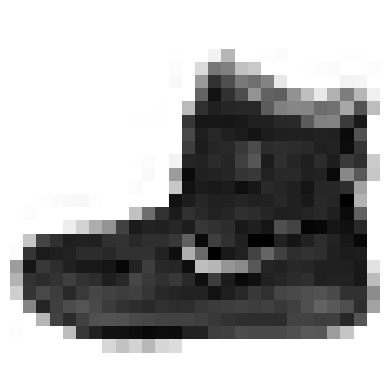

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [9]:
y_train

array([9, 0, 0, ..., 9, 0, 2], shape=(55000,), dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Ankle boot'

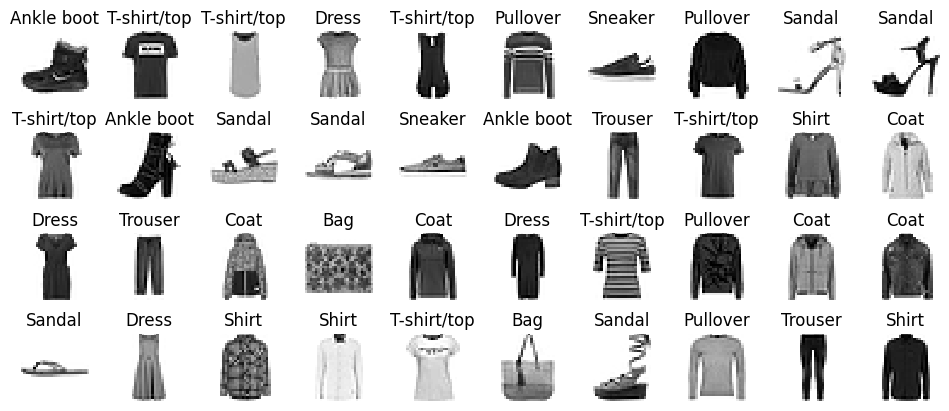

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights,biases = hidden1.get_weights()
weights

array([[ 0.05487226,  0.04471076,  0.01916928, ..., -0.0723699 ,
        -0.02024366,  0.03702825],
       [-0.07406407,  0.02011751,  0.05381483, ..., -0.02878403,
        -0.03478452,  0.06274652],
       [ 0.03799656, -0.03137044, -0.05667732, ..., -0.01553579,
        -0.03383072,  0.03435611],
       ...,
       [-0.03225306,  0.02313939,  0.00305831, ...,  0.06168975,
        -0.05130924, -0.04199192],
       [-0.05400822,  0.02949794, -0.03274535, ..., -0.04888865,
        -0.05215195,  0.02011813],
       [-0.05475754, -0.03549712,  0.0271977 , ...,  0.05762033,
        -0.02366975, -0.05121892]], shape=(784, 300), dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7499 - loss: 0.7518 - val_accuracy: 0.8268 - val_loss: 0.5185
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8275 - loss: 0.4955 - val_accuracy: 0.8344 - val_loss: 0.4619
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8444 - loss: 0.4463 - val_accuracy: 0.8460 - val_loss: 0.4365
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8542 - loss: 0.4172 - val_accuracy: 0.8524 - val_loss: 0.4201
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8606 - loss: 0.3960 - val_accuracy: 0.8542 - val_loss: 0.4080
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8667 - loss: 0.3792 - val_accuracy: 0.8560 - val_loss: 0.3982
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8720 - loss: 0.3650 - val_accuracy: 0.8574 - val_loss: 0.3911
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8755 - loss: 0.3530 - 

In [25]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [26]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [27]:
history.history

{'accuracy': [0.7499454617500305,
  0.8274545669555664,
  0.8443999886512756,
  0.854163646697998,
  0.8605636358261108,
  0.8667272925376892,
  0.871999979019165,
  0.8754545450210571,
  0.878563642501831,
  0.8819636106491089,
  0.8849090933799744,
  0.887109100818634,
  0.890145480632782,
  0.891981840133667,
  0.894563615322113,
  0.8966545462608337,
  0.8984000086784363,
  0.9003818035125732,
  0.9022908806800842,
  0.9043272733688354,
  0.9063090682029724,
  0.9082363843917847,
  0.909927248954773,
  0.9117818474769592,
  0.913490891456604,
  0.9149272441864014,
  0.916490912437439,
  0.9176909327507019,
  0.9192181825637817,
  0.9208363890647888],
 'loss': [0.7518457174301147,
  0.49549639225006104,
  0.4462668001651764,
  0.41721633076667786,
  0.3960144817829132,
  0.3792228102684021,
  0.36503931879997253,
  0.353039413690567,
  0.3424970209598541,
  0.332936555147171,
  0.3241589069366455,
  0.31636035442352295,
  0.3089059293270111,
  0.30193161964416504,
  0.29536709189414

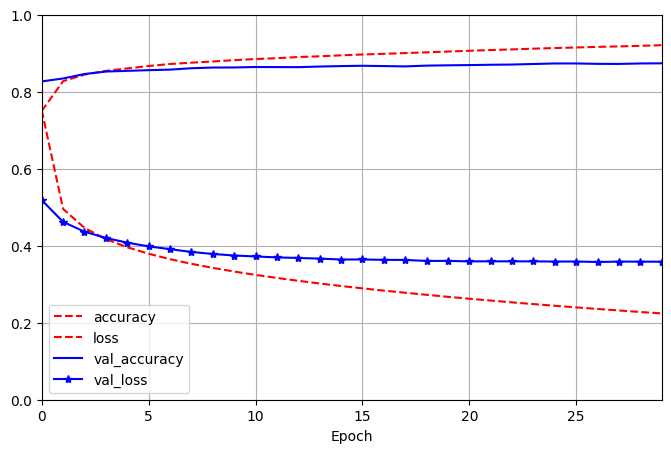

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='Epoch',
    style=["r--","r--","b-","b-*"]
)
plt.show()

In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3749


[0.374879390001297, 0.8726000189781189]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.01, 0.  , 0.74],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

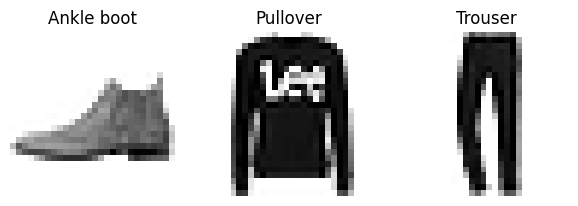

In [34]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [35]:
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [36]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_test,y_test))
mse_test,rmse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
rmse_test
y_pred

c:\Users\utkarsh\OneDrive\Desktop\AI LEARNIGN\ai\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.8461 - loss: 0.7159 - val_RootMeanSquaredError: 0.6173 - val_loss: 0.3810
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6075 - loss: 0.3690 - val_RootMeanSquaredError: 0.5986 - val_loss: 0.3583
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5858 - loss: 0.3432 - val_RootMeanSquaredError: 0.5872 - val_loss: 0.3449
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5788 - loss: 0.3350 - val_RootMeanSquaredError: 0.5798 - val_loss: 0.3362
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5670 - loss: 0.3215 - val_RootMeanSquaredError: 0.5729 - val_loss: 0.3282
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5654 - loss: 0.3196 - val_RootMeanSquaredError: 0.5693 - val_loss: 0.3241
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5607 - los

array([[0.50240463],
       [1.0685937 ],
       [4.89245   ]], dtype=float32)

In [37]:
rmse_test

0.5402622818946838

In [50]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [39]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30,activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30,activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_],outputs=[output])

In [40]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [41]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])

In [42]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 6)         │         13 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 30)        │        210 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 5)         │         11 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 30)        │        930 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         36 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer,metrics=['RootMeanSquaredError'])

X_train_wide,X_train_deep = X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep = X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep  = X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep = X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide,X_train_deep),y_train,epochs=20,
                    validation_data = ((X_valid_wide,X_valid_deep),y_valid))
mse_test = model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred = model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.4720 - loss: 2.1668 - val_RootMeanSquaredError: 1.2275 - val_loss: 1.5069
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7890 - loss: 0.6225 - val_RootMeanSquaredError: 0.7883 - val_loss: 0.6214
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7062 - loss: 0.4987 - val_RootMeanSquaredError: 0.6631 - val_loss: 0.4397
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6609 - loss: 0.4368 - val_RootMeanSquaredError: 0.6310 - val_loss: 0.3981
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6309 - loss: 0.3981 - val_RootMeanSquaredError: 0.6029 - val_loss: 0.3635
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6105 - loss: 0.3728 - val_RootMeanSquaredError: 0.5890 - val_loss: 0.3469
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5982 - los

In [66]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [67]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [69]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - dense_2_RootMeanSquaredError: 1.3035 - dense_2_loss: 1.6985 - dense_3_RootMeanSquaredError: 1.4204 - dense_3_loss: 2.0171 - loss: 1.7310 - val_dense_2_RootMeanSquaredError: 0.8578 - val_dense_2_loss: 0.7356 - val_dense_3_RootMeanSquaredError: 3.8005 - val_dense_3_loss: 14.4364 - val_loss: 2.1066
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_2_RootMeanSquaredError: 0.7605 - dense_2_loss: 0.5784 - dense_3_RootMeanSquaredError: 0.8865 - dense_3_loss: 0.7858 - loss: 0.5991 - val_dense_2_RootMeanSquaredError: 0.7859 - val_dense_2_loss: 0.6174 - val_dense_3_RootMeanSquaredError: 2.1993 - val_dense_3_loss: 4.8348 - val_loss: 1.0395
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.6985 - dense_2_loss: 0.4879 - dense_3_RootMeanSquaredError: 0.7917 - dense_3_loss: 0.6267 - loss: 0.5018 - val_dense_2_RootMeanSquaredError: 0.6726 - val_dense_2_loss: 0.4523 - val_dense_3_RootMeanSquaredError: 1.

In [70]:
eval_result = model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_result

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_2_RootMeanSquaredError: 0.5709 - dense_2_loss: 0.3257 - dense_3_RootMeanSquaredError: 0.6181 - dense_3_loss: 0.3825 - loss: 0.3316


In [71]:
y_pred_main,y_pred_aux = model.predict((X_new_wide,X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [72]:
y_pred_tuple = model.predict((X_new_wide,X_new_deep))
y_pred = dict(zip(model.output_names,y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
